In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.svm import LinearSVR

In [2]:
filepath = 'Datasets/World Bank Transformed/Life Expectancy World Bank Transformed.csv'
df = pd.read_csv(filepath)
df.head(5)


,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)",...,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2005,12.5,0.026840,0.080361,22.548340,25.107073,63.0,50.0,58.361,...,40.9,310.940,15.2,108.6,0.166,46.151929,17.010552,34.5,5.0,7.925
1,Afghanistan,2006,13.9,0.023954,0.089757,22.665133,28.919823,63.0,53.0,58.684,...,40.5,314.837,15.1,104.3,0.166,47.285901,17.051949,31.9,4.9,7.925
2,Afghanistan,2007,15.3,0.021068,0.109940,23.000316,32.717205,63.0,55.0,59.111,...,40.1,318.012,15.0,100.0,0.182,48.419873,17.069881,28.6,4.8,7.924
3,Afghanistan,2008,16.8,0.018182,0.165573,23.036721,39.969898,64.0,59.0,59.852,...,39.4,305.060,15.0,95.9,0.183,49.553845,17.089904,25.4,4.6,7.928
4,Afghanistan,2009,18.2,0.015296,0.239507,23.242264,43.260769,63.0,60.0,60.364,...,38.4,293.605,14.4,91.8,0.220,50.687817,17.125517,22.2,4.4,7.923


In [3]:
df.shape

(2930, 21)

In [4]:
df.describe()

,Year,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,2009.754266,62.710802,5.728114,4.054336,24.402138,848.425576,82.384300,86.094539,69.608411,2.941311,21.697543,228.582497,18.528225,39.583754,1.604763,29.216220,16.152955,11.241672,10.873652,7.992285
std,5.726528,38.762942,4.198290,4.877594,2.231880,1595.853610,20.017791,14.249865,8.909248,2.516668,7.850546,120.767095,8.829668,40.628936,1.477540,16.904518,1.727102,10.593525,9.232514,5.907175
min,2000.000000,0.100000,0.000000,0.025112,18.145601,4.447845,2.000000,16.000000,41.957000,0.100000,7.300000,49.162000,2.100000,2.300000,0.011000,5.446711,11.561001,2.500000,0.000000,0.116000
25%,2005.000000,23.350000,2.116397,0.598888,22.892575,57.189605,76.000000,80.000000,63.852500,1.000000,15.725000,137.289500,12.100000,8.625000,0.266790,17.123053,15.078913,2.500000,5.200000,3.850000
50%,2010.000000,80.700000,5.321511,2.191826,24.210105,190.399719,90.500000,92.000000,71.409000,2.100000,21.600000,209.547000,17.100000,22.800000,1.248500,24.210970,16.186159,6.700000,8.200000,6.215000
75%,2015.000000,100.000000,8.900125,5.989753,26.074140,695.165390,96.000000,96.000000,76.448585,4.207500,26.400000,295.014250,25.500000,60.375000,2.652000,37.459130,17.305877,16.500000,13.500000,10.650750
max,2019.000000,100.000000,19.047270,31.274316,30.693523,10661.028320,99.000000,99.000000,84.356341,14.690000,48.100000,774.859000,64.600000,228.500000,8.427000,95.242644,21.065255,54.000000,92.600000,37.320000


In [5]:
X = df.drop(['Year', 'Country Name', 'Life expectancy at birth, total (years)'], axis=1)  # Features
y = df['Life expectancy at birth, total (years)'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train



array([[-0.32067685, -0.11009387, -0.1136403 , ..., -0.81242664,
        -0.12043515,  3.4477478 ],
       [ 0.96489397,  1.57644583,  0.8809489 , ..., -0.83127111,
         0.51082121, -0.6431419 ],
       [-1.49524457, -0.33824724, -0.80821411, ...,  1.39237649,
        -0.46281147, -1.18001205],
       ...,
       [-1.60366621,  0.32731122, -0.73346474, ..., -0.02095885,
        -1.01917301,  1.37054348],
       [ 0.53637036, -0.1591764 , -0.23933933, ..., -0.22824803,
         1.45235611,  0.18412465],
       [-1.59334034,  1.79075746, -0.80318559, ...,  1.77868815,
        -0.67679668, -0.88083111]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca_data = pca.fit(X_train)
pca_data.explained_variance_ratio_

array([0.40267739, 0.13038698, 0.08852529, 0.07326725, 0.05352964,
       0.04424309, 0.03820614, 0.02952276, 0.02598469, 0.02483801])

In [8]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)

array([40.27, 53.31, 62.16, 69.49, 74.84, 79.26, 83.08, 86.03, 88.63,
       91.11])

In [9]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(2344, 10)

In [10]:

for i in ['linear','poly','rbf']:
    ker = SVR(kernel = i, gamma = 'auto')
    ker.fit(X_train, y_train)
    ker_train= ker.score(X_train,y_train)
    ker_test = ker.score(X_test, y_test)
    print('For the', i,'kernel, the train score is: {:.4f}'.format(ker_train))
    print('For the', i,'kernel, the test score is: {:.4f}'.format(ker_test))
    print('\n')

For the linear kernel, the train score is: 0.9426
For the linear kernel, the test score is: 0.9331


For the poly kernel, the train score is: 0.9336
For the poly kernel, the test score is: 0.9085


For the rbf kernel, the train score is: 0.9672
For the rbf kernel, the test score is: 0.9603




# SVR with Kernel Linear

In [11]:

#Tuning using GridSearchCV 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_ker_lin = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv = 5, return_train_score=True)
grid_ker_lin.fit(X_train,y_train)

print("Best parameters for kernel SVR linear: {}".format(grid_ker_lin.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_lin.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}
Best parameters for kernel SVR linear: {'C': 1, 'epsilon': 1.0}
Best cross-validationscore: 0.94


In [12]:
best_kerlinsvr = SVR( kernel = 'linear', C=100, epsilon = 1.0)
best_kerlinsvr.fit(X_train, y_train)
ykerlinsvr_predicted = best_kerlinsvr.predict(X_test)

print('Train score(R2): {:.4f}'.format(best_kerlinsvr.score(X_train, y_train)))
print('Test score(R2): {:.4f}'.format(best_kerlinsvr.score(X_test, y_test)))
MSE = np.square(np.subtract(y_test,ykerlinsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))
RMSE = np.sqrt(MSE)
print('RMSE: {:.4f}'.format(RMSE))

Train score(R2): 0.9428
Test score(R2): 0.9332
MSE: 5.1183
RMSE: 2.2624


In [13]:
from sklearn.model_selection import cross_val_score


# SVR with best hyper parameter
svr = SVR(kernel='linear', C=100, epsilon=1.0, gamma = 0.001)

# MSE Cross-validation with 5 folds
scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mean of RMSE 
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Cross-Validation RMSE scores:", rmse_scores)
print("Mean RMSE:", mean_rmse)


Cross-Validation RMSE scores: [2.24322082 2.10168772 2.15950201 2.17368597 2.06920087]
Mean RMSE: 2.1494594756122325


In [14]:
# SVR with best hyper parameter
svr = SVR(kernel='linear', C=100, epsilon=1.0, gamma=0.001)

# R2 - Cross-validation with 5 folds
r2_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')

# Mean of R2 score
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print("Cross-Validation R² scores:", r2_scores)
print("Mean R² score:", mean_r2)


Cross-Validation R² scores: [0.9375606  0.94415618 0.94152266 0.94251965 0.94482709]
Mean R² score: 0.9421172357775275


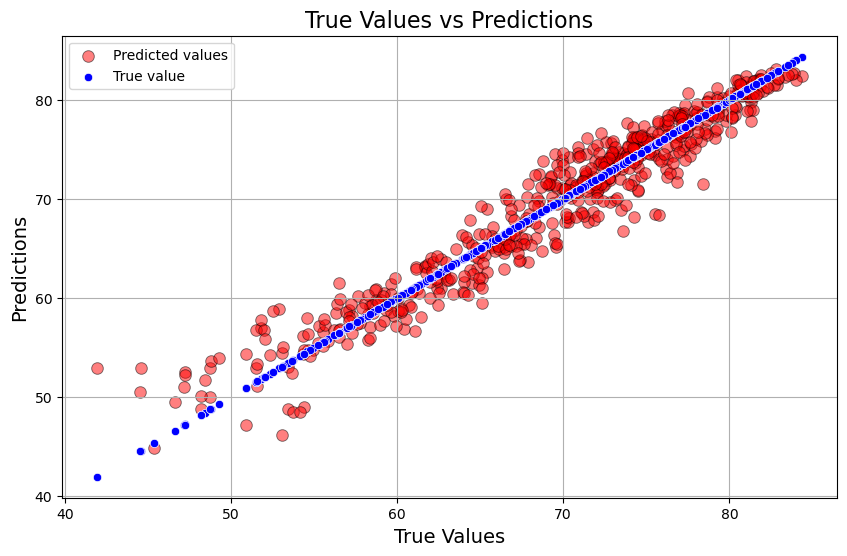

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ykerlinsvr_predicted, color='red', alpha=0.5, s=70, edgecolor='k', label='Predicted values')
sns.scatterplot(x=y_test, y=y_test, color='blue', label='True value')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.title("True Values vs Predictions", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


# SVR with Kernel RBF

In [16]:
#Tuning GridSearchCV 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}

grid_ker_rbf = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv = 5, return_train_score=True)
grid_ker_rbf.fit(X_train,y_train)

print("Best parameters for kernel rbf: {}".format(grid_ker_rbf.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_rbf.best_score_))
print('Train score(R2): {:.4f}'.format(grid_ker_rbf.score(X_train, y_train)))
print('Test score(R2): {:.4f}'.format(grid_ker_rbf.score(X_test, y_test)))

Best parameters for kernel rbf: {'C': 100, 'epsilon': 0.1, 'gamma': 0.1}
Best cross-validationscore: 1.00
Train score(R2): 0.9987
Test score(R2): 0.9955


In [17]:
best_kerrbfsvr = SVR( kernel = 'rbf', C=100, gamma=0.1, epsilon=0.01)
best_kerrbfsvr.fit(X_train, y_train)
ykerrbfsvr_predicted = best_kerrbfsvr.predict(X_test)

MSE = np.square(np.subtract(y_test,ykerrbfsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))
RMSE = np.sqrt(MSE)
print('RMSE: {:.4f}'.format(RMSE))

MSE: 0.3440
RMSE: 0.5865


In [18]:
from sklearn.model_selection import cross_val_score


# SVR with best hyper parameter
svr = SVR(kernel='rbf', C=100, epsilon=0.01, gamma=0.1)

# MSE Cross-validation with 5 folds
scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Mean of RMSE 
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Cross-Validation RMSE scores:", rmse_scores)
print("Mean RMSE:", mean_rmse)


Cross-Validation RMSE scores: [0.74812898 0.63061422 0.55081057 0.69436139 0.51938997]
Mean RMSE: 0.6286610263768841


In [19]:
# SVR with best hyper parameter
svr = SVR(kernel='rbf', C=100, epsilon=0.01, gamma=0.1)

# R2 Score - Cross-validation with 5 folds
r2_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')

# Mean of R2 score
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print("Cross-Validation R² scores:", r2_scores)
print("Mean R² score:", mean_r2)


Cross-Validation R² scores: [0.99305507 0.99497234 0.99619561 0.99413461 0.99652378]
Mean R² score: 0.9949762812708004


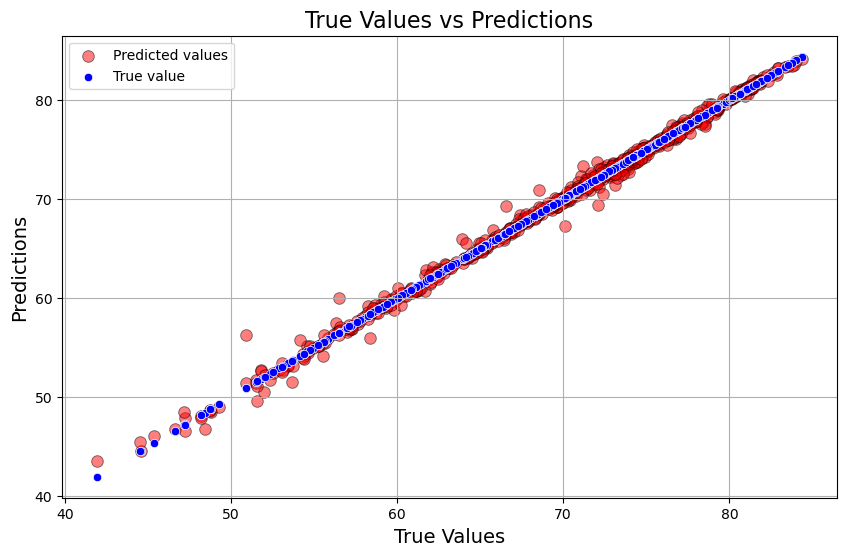

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ykerrbfsvr_predicted, color='red', alpha=0.5, s=70, edgecolor='k', label='Predicted values')
sns.scatterplot(x=y_test, y=y_test, color='blue', label='True value')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.title("True Values vs Predictions", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
